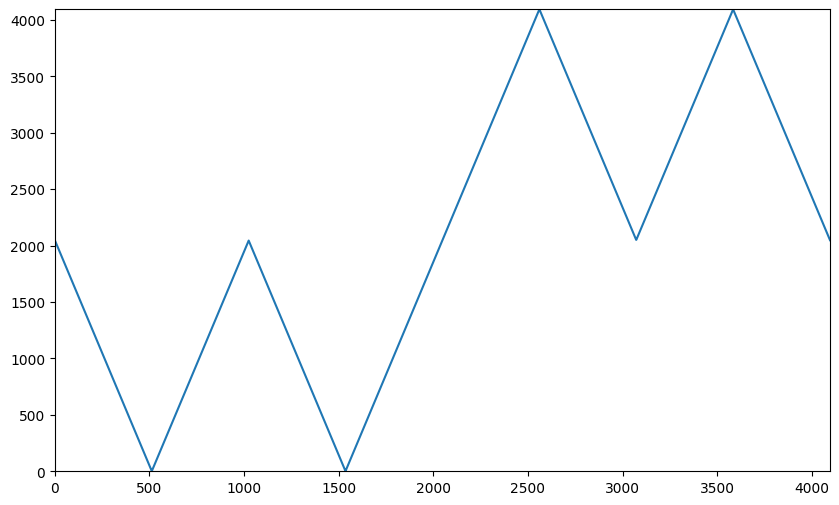

4096
#pragma once
#include <Arduino.h>
const uint16_t tri_wavefold_12bit_4096[4096] = {
2048,2044,2040,2036,2032,2028,2024,2020,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976,1972,1968,1964,1960,1956,1952,1948,1944,1940,1936,1932,1928,1924,1920,1916,1912,1908,1904,1900,1896,1892,1888,1884,1880,1876,1872,1868,1864,1860,1856,1852,1848,1844,1840,1836,1832,1828,1824,1820,1816,1812,1808,1804,1800,1796,1792,1788,1784,1780,1776,1772,1768,1764,1760,1756,1752,1748,1744,1740,1736,1732,1728,1724,1720,1716,1712,1708,1704,1700,1696,1692,1688,1684,1680,1676,1672,1668,1664,1660,1656,1652,1648,1644,1640,1636,1632,1628,1624,1620,1616,1612,1608,1604,1600,1596,1592,1588,1584,1580,1576,1572,1568,1564,1560,1556,1552,1548,1544,1540,1536,1532,1528,1524,1520,1516,1512,1508,1504,1500,1496,1492,1488,1484,1480,1476,1472,1468,1464,1460,1456,1452,1448,1444,1440,1436,1432,1428,1424,1420,1416,1412,1408,1404,1400,1396,1392,1388,1384,1380,1376,1372,1368,1364,1360,1356,1352,1348,1344,1340,1336,1332,1328,1324,13

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def tri(x, freq, fs):
    p = float((1/freq) * fs)
    x = x + p/4
    return 4 * np.abs((x / p) - np.floor((x / p) + 0.5)) - 1

def sine(x, freq, fs):
    return np.sin(2 * np.pi * x * freq / fs)

def half(value):
    return value >> 1

# wave_length = 256
wave_length = 4096
wave_height = 4096
# X軸の範囲を設定
x = np.linspace(0, wave_length, wave_length)

# Y軸の範囲を設定
bias = half(wave_height)
vp = half(wave_height) - 1
y1 = bias + vp * sine(x, 1,wave_length)
y2 = bias + vp * tri(x, 1, wave_length)
y = bias + vp * tri(y2, 1, wave_length)

# プロットを作成
plt.figure(figsize=(10, 6))
plt.plot(x, y)
# plt.plot(a)

# X軸とY軸の範囲を設定
plt.xlim(0, wave_length - 1)
plt.ylim(0, wave_height - 1)

# グラフを表示
plt.show()

a = [str(int(i)) for i in y.tolist()]
print(len(a))
print('#pragma once')
print('#include <Arduino.h>')
print(f'const uint16_t tri_wavefold_12bit_4096[{wave_length}] = ' + '{')
print(','.join(a))
print('};')